In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import pydotplus
from IPython.display import Image  

In [2]:
df =  pd.read_csv('test.csv',sep =";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.shape

(4521, 17)

In [4]:
df.std()

age           10.576211
balance     3009.638142
day            8.247667
duration     259.856633
campaign       3.109807
pdays        100.121124
previous       1.693562
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
Q1 = df.drop(['y'], axis=1).quantile(0.25)

Q3 = df.drop(['y'], axis=1).quantile(0.75)


IQR = Q3 - Q1

print(IQR)

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

age           16.0
balance     1411.0
day           12.0
duration     225.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [7]:
df.shape

(2803, 17)

In [8]:
df.std()

age           9.867949
balance     882.680979
day           8.336248
duration    146.238304
campaign      1.351701
pdays         0.000000
previous      0.000000
dtype: float64

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no


In [10]:
df.drop(columns=['month', 'pdays', 'previous','poutcome'], inplace=True)

In [11]:
df_target = df['y']

df_feature = df.drop('y', axis = 1)

In [12]:
df_num = df_feature.select_dtypes(include = [np.number])
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object')

In [13]:
df_cat = df_feature.select_dtypes(include = [np.object])
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact'], dtype='object')

In [14]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [16]:
df_target.replace(('yes', 'no'), (1,0), inplace=True)
df_target.head()

0    0
3    0
4    0
7    0
8    0
Name: y, dtype: int64

In [47]:
df1 = pd.concat([df_num, dummy_var], axis = 1)
df1.head()

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,30,1787,19,79,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,0,0,0,1,0,...,1,0,0,1,0,0,1,1,0,1
4,59,0,5,226,1,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
7,39,147,6,151,2,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
8,41,221,14,57,2,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [48]:
pd.DataFrame(df1).columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown'],
      dtype='object')

In [ ]:
#df.y.replace(('yes', 'no'), (1,0), inplace=True)

In [ ]:
#df.default.replace(('yes', 'no'), (1,0), inplace=True)

In [ ]:
#df.loan.replace(('yes', 'no'), (1,0), inplace=True)

In [ ]:
#df.housing.replace(('yes', 'no'), (1,0), inplace=True)

In [ ]:
#map_marital = {'married': 0, 'single': 1, 'divorced': 2}
#df['marital'] = df['marital'].replace(map_marital)

In [ ]:
#map_education = {'primary': 0, 'tertiary': 1, 'secondary': 2,'unknown':3}
#df['education'] = df['education'].replace(map_education)

In [ ]:
#df.education.unique()

### confusion matrix (heatmap)  roc-auc curve.

In [32]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
       
    cm = confusion_matrix(y_test, y_pred)
   
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                              index = ['Actual:0','Actual:1'])
  
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)
    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)
    plt.show()

In [33]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for bank ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)


In [34]:
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

# Model creation

In [42]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'y'],
      dtype='object')

In [55]:
ss = StandardScaler()

num_scaled = ss.fit_transform(df1)

Xs =pd.DataFrame(num_scaled,columns=df1.columns) 

Xs.head()

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,-1.064403,1.302641,0.383438,-0.893108,-0.887507,-0.529064,-0.200185,-0.156487,-0.507459,-0.207776,...,0.783984,-0.593419,-1.050131,-0.633640,-0.19922,-0.151633,-1.128414,-0.447118,-0.243587,-0.747053
1,-1.064403,0.950242,-1.536233,-0.072383,1.332316,-0.529064,-0.200185,-0.156487,1.970603,-0.207776,...,0.783984,-0.593419,-1.050131,1.578183,-0.19922,-0.151633,0.886200,2.236547,-0.243587,1.338594
2,1.874928,-0.722234,-1.296275,0.112280,-0.887507,1.890131,-0.200185,-0.156487,-0.507459,-0.207776,...,0.783984,-0.593419,0.952262,-0.633640,-0.19922,-0.151633,0.886200,-0.447118,-0.243587,1.338594
3,-0.152197,-0.555667,-1.176295,-0.400673,-0.147566,-0.529064,-0.200185,-0.156487,-0.507459,-0.207776,...,0.783984,-0.593419,0.952262,-0.633640,-0.19922,-0.151633,0.886200,-0.447118,-0.243587,-0.747053
4,0.050515,-0.471816,-0.216460,-1.043574,-0.147566,-0.529064,4.995368,-0.156487,-0.507459,-0.207776,...,0.783984,-0.593419,-1.050131,1.578183,-0.19922,-0.151633,0.886200,-0.447118,-0.243587,1.338594


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, df_target, test_size=0.25, random_state=42)

print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

Training size = 2102
Testing size = 701


## Naive_bayes

In [59]:
seed = 404
np.random.seed(seed)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cv_score = cross_val_score(gnb, X_train, y_train.values.ravel(), cv=10)
gnb_score = cv_score.mean()
print('Gaussian Naive Bayes K-fold Scores:')
print(cv_score)
print()
print('Gaussian Naive Bayes Average Score:')
print(gnb_score)
print()

Gaussian Naive Bayes K-fold Scores:
[0.90521327 0.83412322 0.9        0.17619048 0.85714286 0.87619048
 0.87142857 0.83809524 0.84761905 0.84285714]

Gaussian Naive Bayes Average Score:
0.7948860302414804



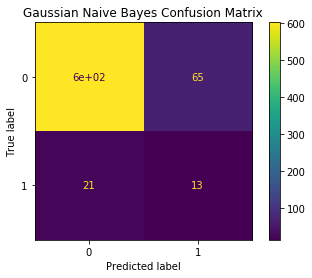

Gaussian Naive Bayes Model Accuracy (on testing set): 
0.8773181169757489


In [60]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

GNB = GaussianNB()
GNB_model = GNB.fit(X_train, y_train.values.ravel())
y_pred = GNB_model.predict(X_test)

disp = plot_confusion_matrix(GNB_model, X_test, y_test)
disp.ax_.set_title('Gaussian Naive Bayes Confusion Matrix')

plt.show()
print('Gaussian Naive Bayes Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

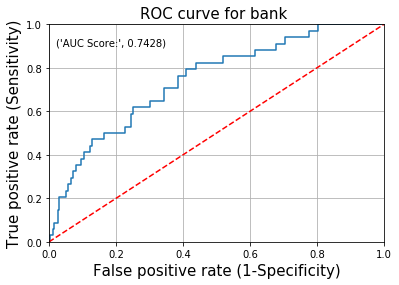

In [61]:
plot_roc(GNB_model)

In [62]:
test_report = get_test_report(GNB_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       667
           1       0.17      0.38      0.23        34

    accuracy                           0.88       701
   macro avg       0.57      0.64      0.58       701
weighted avg       0.93      0.88      0.90       701



In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv_score = cross_val_score(knn, X_train, y_train.values.ravel(), cv=10)
knn_score = cv_score.mean()
print('KNN K-fold Scores):')
print(cv_score)
print()
print('KNN Average Score:')
print(knn_score)

KNN K-fold Scores):
[0.94312796 0.91943128 0.94285714 0.93333333 0.92857143 0.93809524
 0.95238095 0.93809524 0.93809524 0.95238095]

KNN Average Score:
0.9386368765515686


### LOGISTIC REGRESSION

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df1, df_target, random_state = 10, test_size = 0.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (2242, 26)
y_train (2242,)
X_test (561, 26)
y_test (561,)


In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
cv_score = cross_val_score(lr, X_train, y_train.values.ravel(), cv=10)
lr_score = cv_score.mean()
print('Logistic Regression K-fold Scores (training):')
print(cv_score)
print()
print('Logistic Regression Average Score:')
print(lr_score)

Logistic Regression K-fold Scores (training):
[0.94666667 0.92888889 0.95089286 0.94642857 0.9375     0.94196429
 0.94642857 0.95089286 0.94642857 0.94642857]

Logistic Regression Average Score:
0.9442519841269841


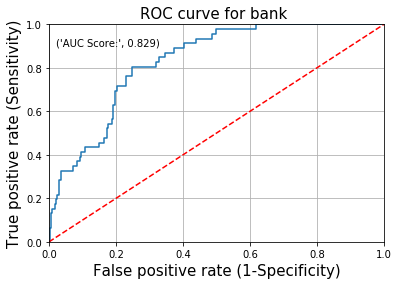

In [66]:
plot_roc(lr_model)

In [67]:
test_report = get_test_report(lr_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       515
           1       0.50      0.07      0.12        46

    accuracy                           0.92       561
   macro avg       0.71      0.53      0.54       561
weighted avg       0.89      0.92      0.89       561



### DECISION TREE

In [68]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state = 1)
cv_score = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
dt_score = cv_score.mean()
print('Decision Tree K-fold Scores:')
print(cv_score)
print()
print('Decision Tree Average Score:')
print(dt_score)

Decision Tree K-fold Scores:
[0.92888889 0.93777778 0.91964286 0.91517857 0.92857143 0.88392857
 0.89285714 0.91071429 0.89732143 0.92410714]

Decision Tree Average Score:
0.9138988095238094


**The best criterion to build a decision tree for the given dataset**

In [78]:
tuned_parameters =[{'criterion':['gini','entropy']}]
dtc =DecisionTreeClassifier(random_state=1)
tree_grid = GridSearchCV(estimator=dtc,
                        param_grid = tuned_parameters,
                        cv=5)
dt_grid = tree_grid.fit(X_train,y_train)
print('Best parameter for decision tree classifier: ',dt_grid.best_params_, '\n')

Best parameter for decision tree classifier:  {'criterion': 'gini'} 



In [81]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [79]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

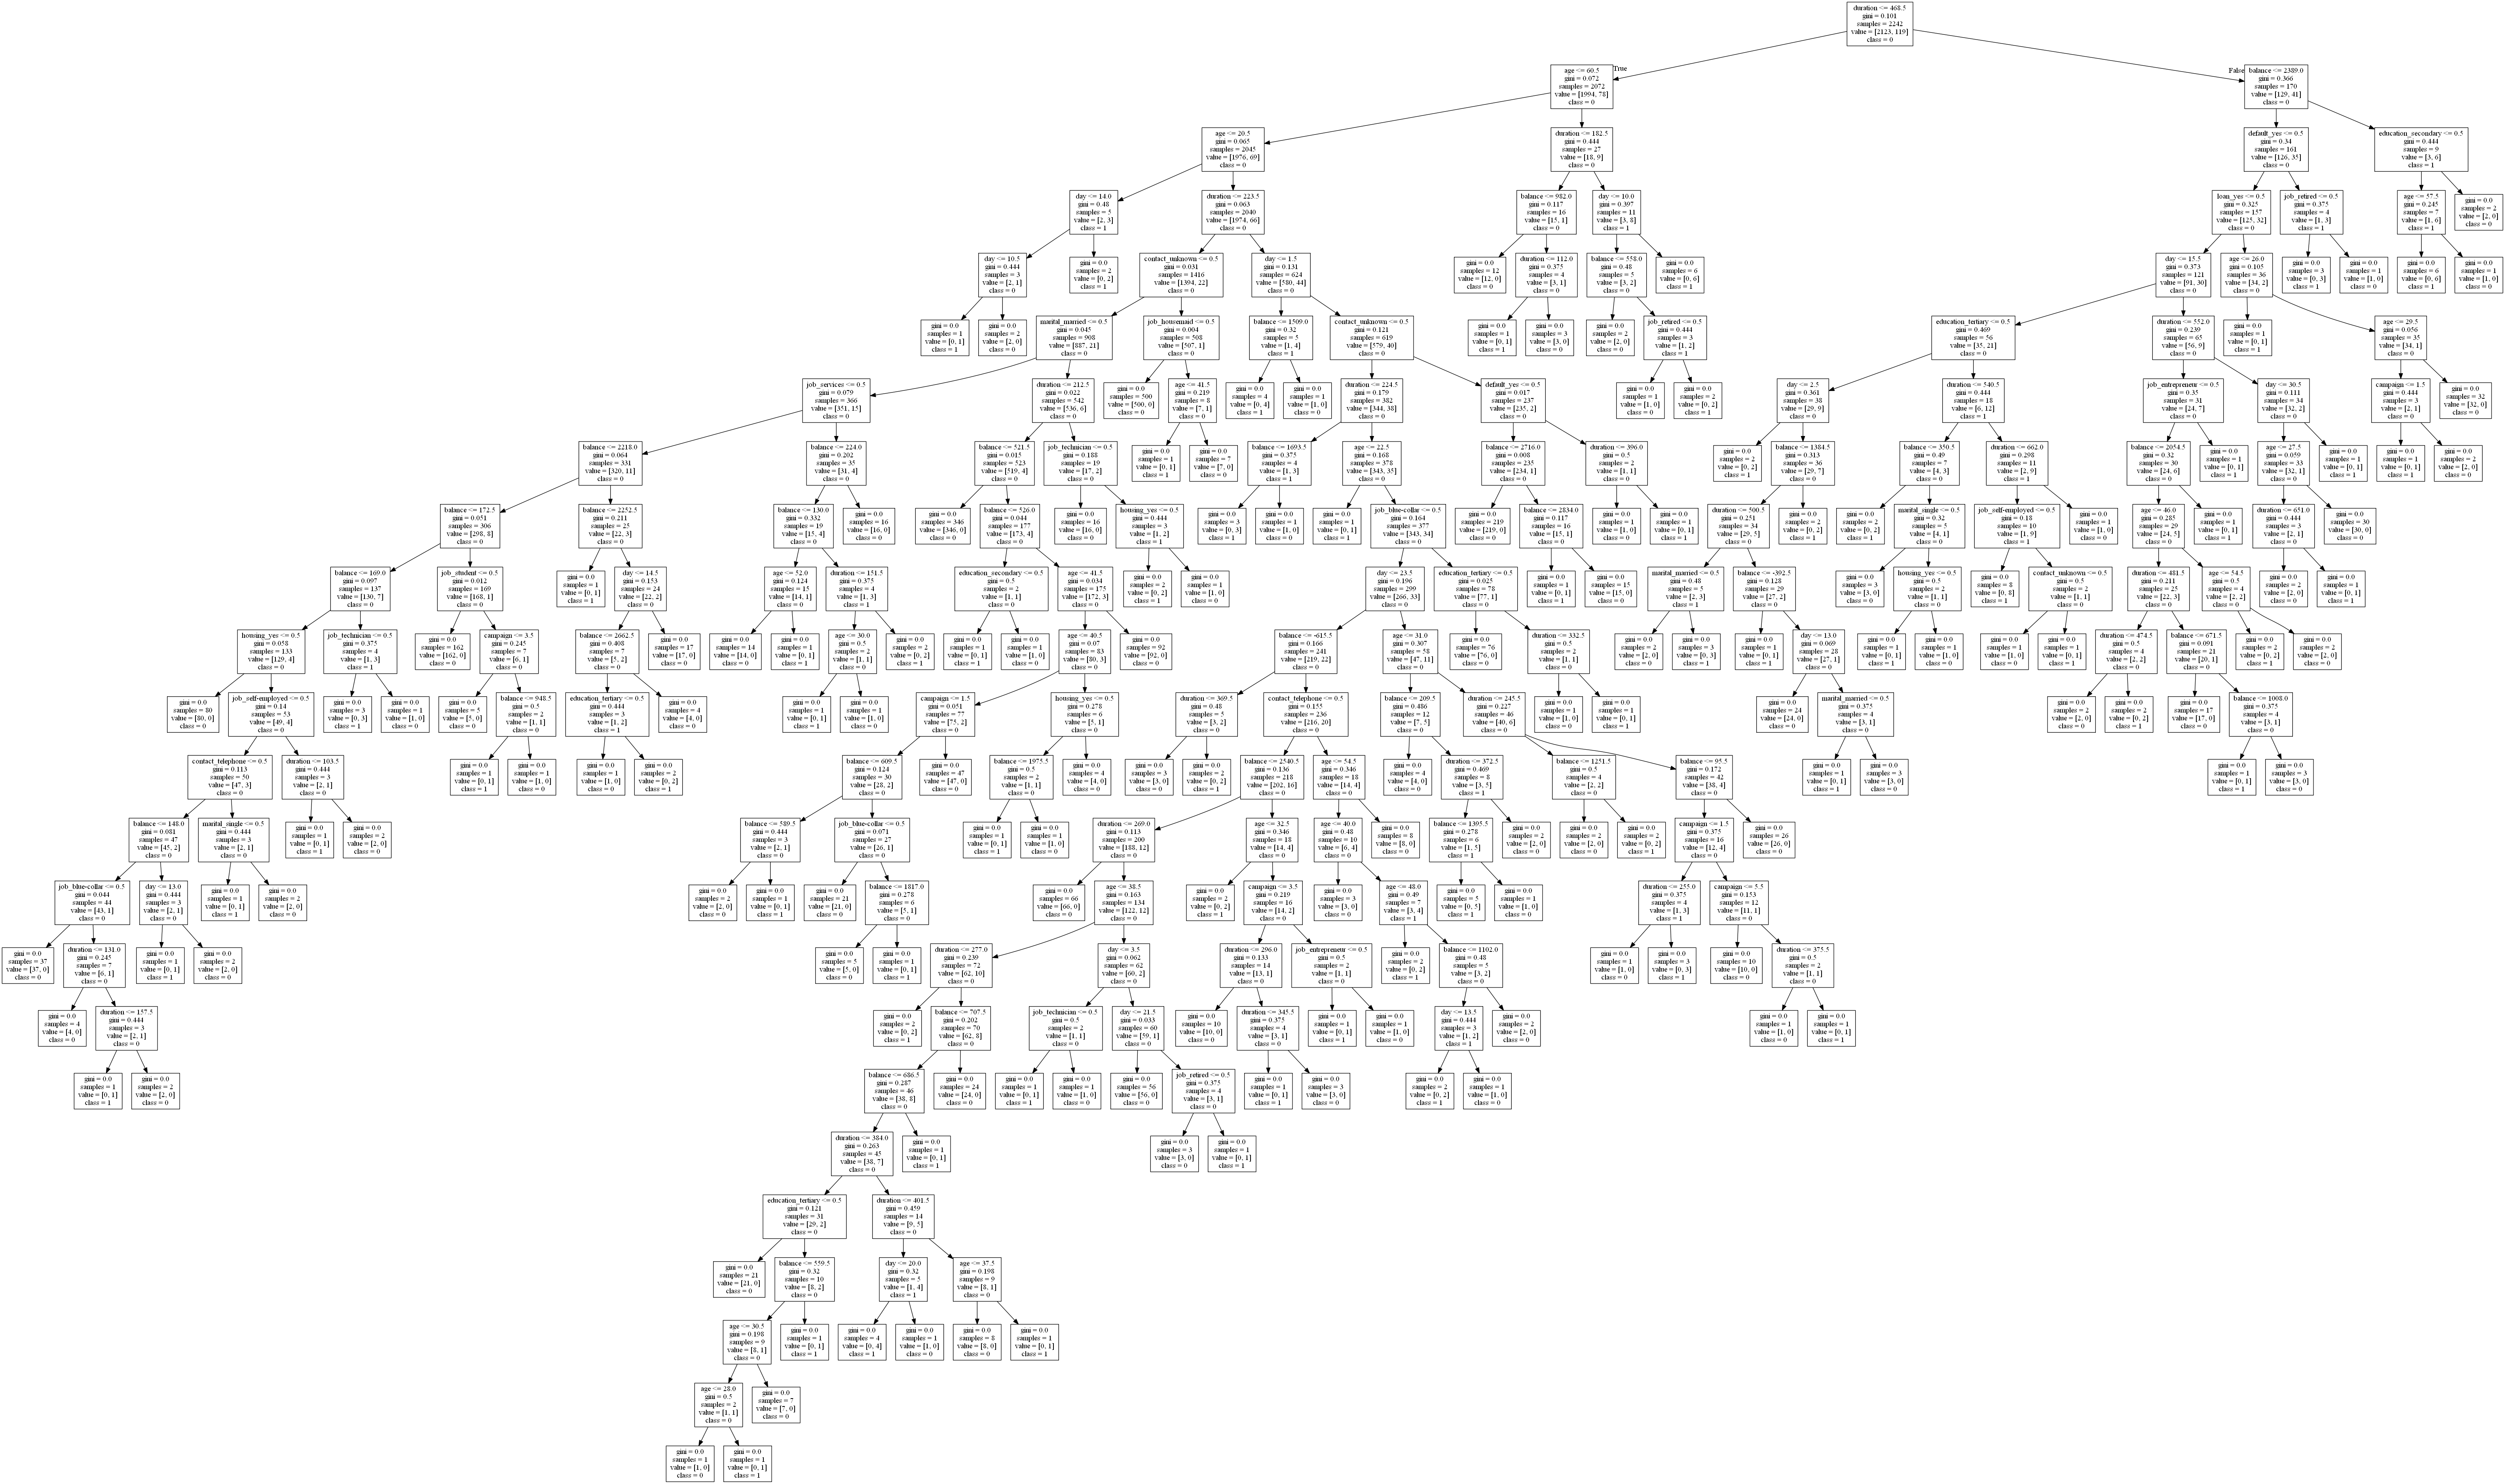

In [80]:
labels = X_train.columns
dot_data = tree.export_graphviz(decision_tree, feature_names = labels, class_names = ["0","1"])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Best performing models


In [69]:
scores = [['Gaussian Naive Bayes', gnb_score],
 ['Logistic Regression', lr_score],
 ['Decision Tree', dt_score],
 ['K-Nearest Neighbor', knn_score]]
 

df_scores = pd.DataFrame(scores,
                         columns = ['Model', 'Score Average']
                        )
df_scores

,Model,Score Average
0,Gaussian Naive Bayes,0.794886
1,Logistic Regression,0.944252
2,Decision Tree,0.913899
3,K-Nearest Neighbor,0.938637


In [82]:
n=[6,8,10,12,14,16]

p=[{'n_estimators':n}]

rf=RandomForestClassifier(criterion='entropy',random_state=1)

rfg=GridSearchCV(estimator=rf,param_grid=p,cv=5)

model=rfg.fit(X_train,y_train)

print(model.best_params_)


{'n_estimators': 14}


In [83]:
rfbest=RandomForestClassifier(n_estimators=14,criterion='entropy',random_state=1)
rf_model=rfbest.fit(X_train,y_train)
rf_model.feature_importances_
#print(X_train.columns,rf_model.feature_importances_)
imp=pd.DataFrame({"Features" : X_train.columns,"Importance" :rf_model.feature_importances_})
print(imp)

               Features  Importance
0                   age    0.127601
1               balance    0.135422
2                   day    0.145467
3              duration    0.259545
4              campaign    0.049736
5       job_blue-collar    0.015155
6      job_entrepreneur    0.004749
7         job_housemaid    0.007980
8        job_management    0.016716
9           job_retired    0.011239
10    job_self-employed    0.003303
11         job_services    0.009507
12          job_student    0.004909
13       job_technician    0.016020
14       job_unemployed    0.003550
15          job_unknown    0.000167
16      marital_married    0.020659
17       marital_single    0.017840
18  education_secondary    0.018421
19   education_tertiary    0.018552
20    education_unknown    0.005378
21          default_yes    0.012816
22          housing_yes    0.024181
23             loan_yes    0.014214
24    contact_telephone    0.011740
25      contact_unknown    0.045132


In [84]:
rfbest=RandomForestClassifier(n_estimators=10,random_state=1)
rf_model=rfbest.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

precision=cm[1,1]/(cm[1,1]+cm[0,1])
precision
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])

sensitivity

0.0

In [85]:
rfbest=RandomForestClassifier(criterion='entropy',min_samples_leaf=3,random_state=1)
rf_model=rfbest.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       515
           1       0.00      0.00      0.00        46

    accuracy                           0.92       561
   macro avg       0.46      0.50      0.48       561
weighted avg       0.84      0.92      0.88       561



C:\Users\medha\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import statsmodels
import statsmodels.api as sm

In [ ]:
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

In [ ]:
print('AIC:', logreg.aic)

In [ ]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

In [ ]:
y_pred_prob = logreg.predict(X_test)
y_pred_prob.head()

In [ ]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [ ]:
y_pred[0:5]

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
df['contact'].value_counts()